In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat/dogvscat/test/0/272.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/270.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/253.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/260.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/273.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/265.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/271.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/251.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/274.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/256.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/254.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/267.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/252.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/258.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/261.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/264.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/269.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/263.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/255.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/257.jpg
/kaggle/input/dog-vs

In [2]:
import matplotlib.pyplot
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from sklearn.metrics import accuracy_score

# dataset

In [3]:
train_dir='/kaggle/input/dog-vs-cat/dogvscat/train'
test_dir='/kaggle/input/dog-vs-cat/dogvscat/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datag=ImageDataGenerator(rescale=1./255)
test_datg=ImageDataGenerator(rescale=1./255)

train_g=train_datag.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_g=test_datg.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')



Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


# N Network

In [5]:
model=Sequential()

In [6]:
model.add(Input(shape=(224, 224, 3)))

# Add Conv2D and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

# train

In [8]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3),metrics=['accuracy'])


In [9]:
history= model.fit(train_g, steps_per_epoch=train_g.samples//20,epochs=50,validation_data=test_g,validation_steps=test_g.samples//20)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4931 - loss: 0.8730 - val_accuracy: 0.5750 - val_loss: 0.6875
Epoch 2/50


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 0.7193
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5017 - loss: 0.6945 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.6884
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5097 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: 0.6905
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5460 - loss: 0.6875 - val_accuracy: 0.6000 - val_loss: 0.6720
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.7393
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6640 - loss: 0.6869 - val_accura

# graphs

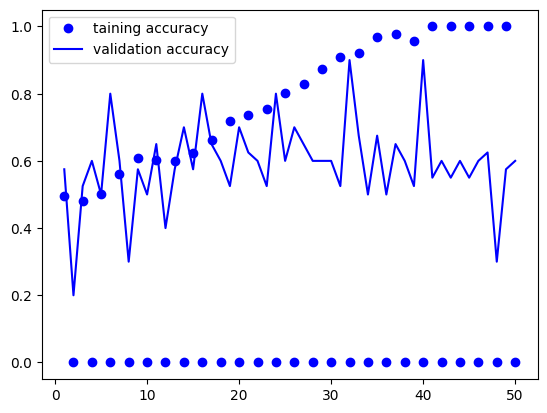

In [10]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']



epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='taining accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.legend()




plt.show()

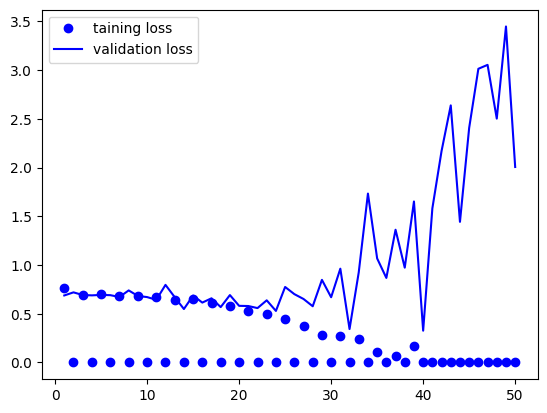

In [11]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,'bo',label='taining loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.legend()

plt.show()

In [12]:
model.save('tascatdog.h5')

# prediction

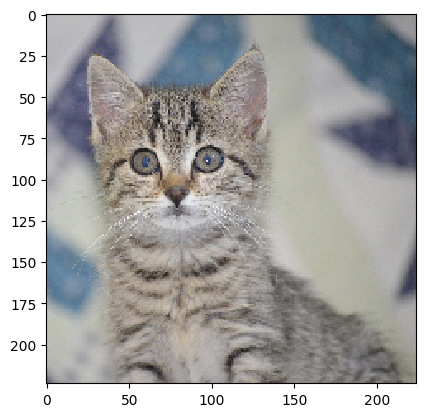

In [13]:
from tensorflow.keras.preprocessing import image
path="/kaggle/input/dog-vs-cat/dogvscat/test/0/271.jpg"
img=image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')

In [14]:
img_array=np.array(img)
img_array.shape

(224, 224, 3)

In [15]:
img_array=img_array.reshape(1,224,224,3)

In [16]:
a=model.predict(img_array)
if(a==[[0]]):
    print('cat')
else:
    print('dog')
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
cat
